# Model Setup
Model 1 takes in img outputs moving probability
Model 2 takes in a sequence of 16 moving probs outputs falling probability

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')
import tensorflow_datasets as tfds

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
import datetime

import matplotlib.pyplot as plt

import cv2

GPU limitation

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 2GB of memory on the first GPU
    try:
        tf.config.set_logical_device_configuration(gpus[0], [tf.config.LogicalDeviceConfiguration(memory_limit=2048)])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


2023-07-06 15:27:49.430793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-06 15:27:49.446544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-06 15:27:49.446700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-06 15:27:49.447689: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

# Building the Models

## Model 1

### Train

In [19]:
data = DataLoader.from_folder("./datasets/model1_data")
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 4362, num_label: 2, labels: Moving, still.


In [20]:
model = image_classifier.create(train_data, use_augmentation=True)

INFO:tensorflow:Retraining the models...
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_22 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/5


2023-07-06 15:16:30.610437: E tensorflow/stream_executor/cuda/cuda_dnn.cc:373] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2023-07-06 15:16:30.610488: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1120 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'efficientnet-lite0/model/stem/conv2d/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/kevin/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/home/kevin/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/kevin/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/kevin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/kevin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/kevin/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/kevin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/kevin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/kevin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_53644/1475952295.py", line 1, in <module>
      model = image_classifier.create(train_data, use_augmentation=True)
    File "/home/kevin/.local/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/core/task/image_classifier.py", line 339, in create
      image_classifier.train(train_data, validation_data, steps_per_epoch)
    File "/home/kevin/.local/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/core/task/image_classifier.py", line 160, in train
      self.create_model()
    File "/home/kevin/.local/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/core/task/image_classifier.py", line 129, in create_model
      module_layer = hub_loader.HubKerasLayerV1V2(
    File "/home/kevin/.local/lib/python3.8/site-packages/tensorflow_hub/keras_layer.py", line 153, in __init__
      self._func = load_module(handle, tags, self._load_options)
    File "/home/kevin/.local/lib/python3.8/site-packages/tensorflow_hub/keras_layer.py", line 449, in load_module
      return module_v2.load(handle, tags=tags, options=set_load_options)
    File "/home/kevin/.local/lib/python3.8/site-packages/tensorflow_hub/module_v2.py", line 106, in load
      obj = tf.compat.v1.saved_model.load_v2(module_path, tags=tags)
Node: 'efficientnet-lite0/model/stem/conv2d/Conv2D'
DNN library is not found.
	 [[{{node efficientnet-lite0/model/stem/conv2d/Conv2D}}]] [Op:__inference_train_function_15931]

### Evaluate & Export

In [21]:
loss, accuracy = model.evaluate(test_data)
# model.summary()

ValueError: Failed to find data adapter that can handle input: <class 'tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader'>, <class 'NoneType'>

In [ ]:
model.export(export_dir='.')

In [ ]:
### QUANTIZE
# method 1: save as savedmodel then load and quantize like model2 did
# method 2: change datatype before saving
'''
def representative_dataset():
  for d in test_data:
    # d = np.expand_dims(d, axis=0)
    yield [tf.dtypes.cast(d, tf.float32)]

# print(dataset.cardinality().numpy())
# print(tf.shape(dataset))
# model.summary()

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_quant_model2 = converter.convert()
with open('model2_quant', 'wb') as f: f.write(tflite_quant_model2)
'''

### Batch predicting multiple vids

In [22]:
falling_paths = ["./datasets/model1_vids/splitted_for_model2/resized_IMG0480_falling.mp4",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG0484_falling.mp4",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG0485_falling.mp4",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG1614_falling.mp4",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG1615_falling.mp4",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG1616_falling.mp4"]

default_paths = ["./datasets/model1_vids/splitted_for_model2/resized_IMG0480_default.MOV",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG0484_default.MOV",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG0485_default.MOV",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG1614_default.MOV",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG1615_default.MOV",
                 "./datasets/model1_vids/splitted_for_model2/resized_IMG1616_default.MOV",
                 "./datasets/model2_vids/resized_jess_jump.MOV",
                 "./datasets/model2_vids/resized_jess_pickup.MOV",
                 "./datasets/model2_vids/resized_jess_run1.MOV",
                 "./datasets/model2_vids/resized_jess_run2.MOV",
                 "./datasets/model2_vids/resized_jess_run3.MOV",
                 "./datasets/model2_vids/resized_jess_run4.MOV",
                 "./datasets/model2_vids/resized_jess_walk1.MOV",
                 "./datasets/model2_vids/resized_jess_walk2.MOV",
                 "./datasets/model2_vids/resized_jess_walk3.MOV",
                 "./datasets/model2_vids/resized_jess_walk4.MOV"]

In [ ]:
def batchPredict(path):
    cap = cv2.VideoCapture(path)
    probs = []
    while True:
        ret, frame = cap.read() 
        if not ret: break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb = np.expand_dims(frame_rgb, axis=0)

        interpreter = tf.lite.Interpreter(model_path="model.tflite")
        interpreter.allocate_tensors()
        output = interpreter.get_output_details()
        input = interpreter.get_input_details()
        output_index = output[0]['index']
        input_index = input[0]['index']

        interpreter.set_tensor(input_index, frame_rgb)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_index)
        output_data = output_data[0]
        output_probs = tf.nn.softmax(output_data.astype(float))

        predicted_index = np.argmax(output_data)
        class_labels = ["Moving", "Still"]
        predicted_class = class_labels[predicted_index]        
        prob = np.around(max(output_probs.numpy()), decimals = 2)

        if predicted_class == "Still": probs.append(np.subtract(1, prob))
        else: probs.append(prob)
    return probs

In [ ]:
def batchPredictMultVids(vid_path_lst):
    record = []
    for vid in vid_path_lst:
        vid_probs = batchPredict(vid)
        print(vid)
        for i in range(len(vid_probs)-15):
            record.append(vid_probs[i:i+16])
            for j in range(i, i+16):
                print(vid_probs[j], end=" ")
            print()
        print()
    return record

In [ ]:
falling = batchPredictMultVids(falling_paths)
default = batchPredictMultVids(default_paths)

## Model 2

### Train

In [5]:
default_data = np.loadtxt('./datasets/model2_data/default.txt')
falling_data = np.loadtxt('./datasets/model2_data/falling.txt')

print(falling_data)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [6]:
mu, sig = 0, 0.001
copy_count = len(default_data)-len(falling_data) #difference in default and length 
oldLen = len(falling_data)
rowi = 0

limit = lambda x : max(min(x,1), 0)

#function to factor out abnormal vals
def limit(x):
    if x > 1: return 1 - (x-1)
    elif x < 0: return abs(x)
    return x

#normalize data since the falling data's count is not as much as the normal 
newLimit = np.vectorize(limit) 

for i in range(copy_count):
    row = falling_data[rowi] + np.random.normal(mu, sig, 16)
    row = newLimit(row)

    falling_data = np.vstack([falling_data, row])
    rowi += 1
    if rowi >= oldLen: rowi = 0 #finish one row 

print(falling_data.shape, default_data.shape)

(6270, 16) (6270, 16)


79/79 [==============================] - 0s 914us/step - loss: 0.5813 - sparse_categorical_accuracy: 0.8525
[0.5813300013542175, 0.8524720668792725]


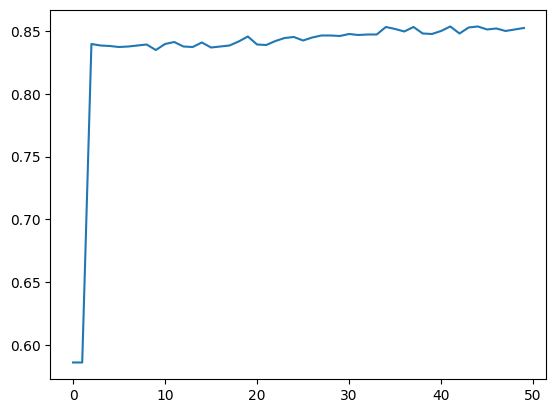

In [9]:
# loading data
inputs = np.concatenate((default_data, falling_data))
outputs = np.concatenate((np.zeros(len(default_data)), np.ones(len(falling_data)))) #ones are falling , zeros are default
dataset_size = len(inputs)
new_indices = np.random.permutation(dataset_size) # shuffle indices to shuffle X and y at the same time
inputs, outputs = inputs[new_indices], outputs[new_indices]

train_size = int(0.8*dataset_size)
test_size = dataset_size - train_size


# train_data = tf.data.Dataset.from_tensor_slices((inputs[:train_size], outputs[:train_size])).batch(128)
X_train, y_train = inputs[:train_size], outputs[:train_size] #x = image, y = label
X_test, y_test = inputs[train_size:], outputs[train_size:]

def shuffle_generator(image, label, seed):
    idx = np.arange(len(image))
    np.random.default_rng(seed).shuffle(idx)
    for i in idx:
        yield image[i], label[i]

 
dataset = tf.data.Dataset.from_generator(
    shuffle_generator,
    args=[X_train, y_train, 42],
    output_signature=(
        tf.TensorSpec(shape=(16,), dtype=tf.uint8),
        tf.TensorSpec(shape=(), dtype=tf.uint8)))

 

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(16,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam",

              loss="sparse_categorical_crossentropy",

              metrics="sparse_categorical_accuracy")

history = model.fit(dataset.batch(32),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=0)

 

print(model.evaluate(X_test, y_test))

 

plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.show()

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
#Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [12]:
model.fit(x=X_train, y=y_train, epochs=6,callbacks=[tensorboard_callback])

Epoch 1/6
314/314 [==============================] - 0s 1ms/step - loss: 0.2915 - sparse_categorical_accuracy: 0.9016
Epoch 2/6
314/314 [==============================] - 0s 1ms/step - loss: 0.2902 - sparse_categorical_accuracy: 0.9022
Epoch 3/6
314/314 [==============================] - 0s 1ms/step - loss: 0.2898 - sparse_categorical_accuracy: 0.9025
Epoch 4/6
314/314 [==============================] - 0s 1ms/step - loss: 0.2901 - sparse_categorical_accuracy: 0.9011
Epoch 5/6
314/314 [==============================] - 0s 1ms/step - loss: 0.2885 - sparse_categorical_accuracy: 0.9035
Epoch 6/6
314/314 [==============================] - 0s 1ms/step - loss: 0.2897 - sparse_categorical_accuracy: 0.9007


### Evaluate & Export

In [30]:
loss, acc = model.evaluate(X_test, y_test)
# model.summary()
# model.save("model2")

40/40 [==============================] - 0s 991us/step - loss: 0.3782 - accuracy: 0.8485


In [8]:
### CONVERT TO TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model2_tflite = converter.convert()
with open('model2.tflite', 'wb') as f: f.write(model2_tflite)

INFO:tensorflow:Assets written to: /tmp/tmpgy6fdty2/assets


2023-06-07 11:16:44.155686: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2023-06-07 11:16:44.445558: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-06-07 11:16:44.445580: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-06-07 11:16:44.446467: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpgy6fdty2
2023-06-07 11:16:44.447205: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-06-07 11:16:44.447233: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpgy6fdty2
2023-06-07 11:16:44.449735: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-06-07 11:16:44.489124: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on Saved

In [29]:
### QUANTIZE
def representative_dataset():
  for d in inputs:
    # d = np.expand_dims(d, axis=0)
    yield [tf.dtypes.cast(d, tf.float32)]

# print(dataset.cardinality().numpy())
# print(tf.shape(dataset))
# model.summary()

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_quant_model2 = converter.convert()
with open('model2_quant', 'wb') as f: f.write(tflite_quant_model2)

INFO:tensorflow:Assets written to: /tmp/tmpdvgpu7f5/assets


INFO:tensorflow:Assets written to: /tmp/tmpdvgpu7f5/assets
/home/jessica/VIA-Fall-Detection/.venv/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-06-07 15:22:06.987031: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-06-07 15:22:06.987052: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-06-07 15:22:06.987225: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpdvgpu7f5
2023-06-07 15:22:06.987830: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-06-07 15:22:06.987841: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpdvgpu7f5
2023-06-07 15:22:06.989672: I tensorflow/cc/sav

# Predict

## Reformat Input

In [47]:
def resize_video(input_path, output_path, width, height):
  # Open the video file
  video = cv2.VideoCapture(input_path)

  # Get the original video's width and height
  original_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  original_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
  
  # Create a VideoWriter object to save the resized video
  fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Codec for the output video
  fps = video.get(cv2.CAP_PROP_FPS)
  writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
  
  while True:
    # Read a frame from the original video
    ret, frame = video.read()
    if not ret: break
    # Resize the frame to the desired width and height
    resized_frame = cv2.resize(frame, (width, height))
    # Write the resized frame to the output video file
    writer.write(resized_frame)

# Release the video capture and writer objects
  video.release()
  writer.release()

In [62]:
# Resize vid
video_path = "compilation_cut.mp4"
output_path = "compilation_cut_resized.mp4"
target_width = 224
target_height = 224

#resize_video(video_path, output_path, target_width, target_height)

# Load resized vid
cap = cv2.VideoCapture(output_path)
# frame_rate = 30
# cap.set(cv2.CAP_PROP_FPS, frame_rate) DOESN'T WORK
print(cap.get(cv2.CAP_PROP_FPS))

29.97


## Pass into model 1

In [63]:
# Initialize list to store the frame classifications
frame_classifications = []
moving_prob = []
# Loop through the frames of the video (need to change to 30 fps)
while True:
    ret, frame = cap.read() 
    #just need to figure out if this is 30 fps

    if not ret: # Break the loop if the video has ended
        break

    ''' Formulate Input Data (frame_rgb) '''
    # Convert the frame to RGB format
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Make frame input data and ensure its type matches the model
    frame_rgb = np.expand_dims(frame_rgb, axis=0)

    ''' Classify the Frame '''
    interpreter = tf.lite.Interpreter(model_path="model.tflite")
    interpreter.allocate_tensors()

    # get_output_details() and get_input_details() return list of dictionaries of tensor details
    # keys: name, index, shape, shape_signature, dtype, quantization, ...
    # len(input) = len(output) = 1, so access the first element
    output = interpreter.get_output_details()
    input = interpreter.get_input_details()
    output_index = output[0]['index']
    input_index = input[0]['index']

    # set input -> invoke -> access output
    interpreter.set_tensor(input_index, frame_rgb)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_index)
    # If the output_data shape is (batch_size, num_classes), select the first frame
    output_data = output_data[0]

    # Convert each entry into probability
    output_probs = tf.nn.softmax(output_data.astype(float))

    # Find the index of the highest probability
    predicted_index = np.argmax(output_data)

    # Assuming you have a list of class labels corresponding to the model's output classes
    class_labels = ["Moving", "Still"]

    # Get the predicted class label
    predicted_class = class_labels[predicted_index]

    # Print the predicted class label
    # print("Predicted Class:", predicted_class)
    frame_classifications.append((predicted_class, max(output_probs.numpy())))
    
    prob = np.around(max(output_probs.numpy()), decimals = 2)
    if predicted_class == "Still":
        
        moving_prob.append(np.subtract(1, prob))
    else:
        moving_prob.append(prob)

## Prepare data for model 2

In [64]:
moving_probs_trimmed = moving_prob[:-(len(moving_prob)%16)]
model2_in = np.array(moving_probs_trimmed).reshape((len(moving_prob)//16, 16))
print(model2_in)

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.
  1.   0.  ]
 [0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.   0.   1.   0.   1.
  1.   1.  ]
 [1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   1.   1.
  1.   1.  ]
 [1.   1.   1.   1.   1.   0.   0.   1.   1.   1.   0.   1.   1.   0.
  1.   1.  ]
 [0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.  ]
 [1.

## Pass into Model 2 and get final prediction

In [65]:
model2 = tf.keras.models.load_model("model2")

In [66]:
vid_preds = model2.predict(model2_in)

In [67]:
threshold = 0.88
bools = vid_preds.reshape((1, len(vid_preds))) > threshold
print(bools)
print(vid_preds.reshape((1, len(vid_preds))))

[[False False False False False False False False False False False False
   True  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False  True False  True  True False
  False False False False False False False False False False False False
  False False]]
[[0.09045138 0.09045138 0.09045138 0.09045138 0.09045138 0.5739342
  0.30349308 0.7925048  0.7975426  0.51072216 0.7444853  0.7925048
  0.929349   0.929349   0.8644172  0.09045138 0.15479052 0.29671496
  0.09045138 0.15544447 0.09045138 0.09045138 0.09045138 0.09045138
  0.09045138 0.17014171 0.12607063 0.09045138 0.09045138 0.19399568
  0.09045138 0.09045138 0.16418059 0.14767478 0.15647146 0.12583217
  0.09045138 0.09045138 0.18011312 0.09045138 0.11525431 0.17111975
  0.26666683 0.929349   0.80626893 0.929349   0.929349   0.2670536
  0.16497837 0.09045138 0.09045138 0.09045138 0.09045138 0.09045138
  0.0